# Исследовательский проект

# 1. Постановка проблемы

У нас имеется крайне интеренсный СИНТЕТИЧЕСКИЙ датасет о повышениях в компании, мною он был найден на сайте Kaggle (https://www.kaggle.com/shivan118/hranalysis). Как мы видим, написан он с ужасным английским от некого Кумара, что причисляет его к гуру образования в интернете - гражданам Индии. Пусть тогда фирма тоже будет индийской, назавем ее "Bollywood Champions". Вроде специфичных для какой-либо отрасли департаментов и прочего не наблюдается, так что пусть наша компнаия будет заниматься созданием кино для местного рынка. Как мы видим из задания на сайте, автор предлагает посмотреть, кто в компании получет повышения (их доля составляет 5% от общего числа). Однако наша проблемы будет интереснее: 

В голливудской компании возник конфликт: сотрудники требуют четких критериев при повышении: многие из них не понимают, почему они не были повышены тогда, когда эту возомжность получили их "друзья-лентяии". Однако разрабатывать четкие критерии отбора нам еще рановато, но мы можем им объяснить на реальных данных, как принимаются решения о повышении. Более того, мы сами лично сможем прогнозировать, какие сотрдуники у нас идут на повышение. Эта информация крайне ценна для компании, ведь мы сможем вкладывать больше ресурсов на удержание наших будущих лидеров, их развитие и обучение.

ПРОБЛЕМА1: Выявить, какие факторы влияют на повышения сотрудников в компании.  
ПРОБЛЕМА2: Разработать модель, которая будет определять вероятность повышения новых или имеющихся сотрудников.

P.S. Очевидно, что на сайте Keggle имеются готовые анализы датасета, но я их, к сожалению, не понимаю во многих моментах, так что буду ориентироваться на знания, полученные в ходе курса. 

# 2. Импорт данных, разведочный анализ данных

In [492]:
# Импортируем библиотеки для работы с данными
import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [493]:
# Импортируем библиотеки для рисования

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [494]:
# Импортируем еще одну чудную библиотеку -- Numpy!Она предназначена для базовых операций над числами при работе с выборками и лежит в основе Pandas

import numpy as np

In [495]:
# Это нам пригодиться для создания тестового и тренинг сета

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [496]:
# Это нам пригодиться для скалирования
from sklearn.preprocessing import MinMaxScaler

In [497]:
# Загрузим CSV-файл с данными (CSV-файл лежит рядом с блокнотом)
df_hr = pd.read_csv('Promotions database.csv')

In [498]:
# Частично отрисуем этот датасет на экран
df_hr

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,7,2,0,1,1,35,5,8,1,0,49,0
1,65141,2,22,1,1,0,1,30,5,4,0,0,60,0
2,7513,1,19,1,1,1,1,34,3,7,0,0,50,0
3,2542,1,23,1,1,0,2,39,1,10,0,0,50,0
4,48945,4,26,1,1,0,1,45,3,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,4,14,1,1,1,1,48,3,17,0,0,78,0
54804,74592,2,27,2,0,0,1,37,2,6,0,0,56,0
54805,13918,5,1,1,1,0,1,27,5,3,1,0,79,0
54806,13614,1,9,0,1,1,1,29,1,2,0,0,45,0


In [499]:
# Проверим датасет на наличие пустых значений при помощи метода .info()
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   employee_id           54808 non-null  int64
 1   department            54808 non-null  int64
 2   region                54808 non-null  int64
 3   education             54808 non-null  int64
 4   gender                54808 non-null  int64
 5   recruitment_channel   54808 non-null  int64
 6   no_of_trainings       54808 non-null  int64
 7   age                   54808 non-null  int64
 8   previous_year_rating  54808 non-null  int64
 9   length_of_service     54808 non-null  int64
 10  KPIs_met >80%         54808 non-null  int64
 11  awards_won?           54808 non-null  int64
 12  avg_training_score    54808 non-null  int64
 13  is_promoted           54808 non-null  int64
dtypes: int64(14)
memory usage: 5.9 MB


In [500]:
# Все данные были переведны в int64 с помощью экселя. Как мы не видим, по некоторым параметрам у нас были пустые значения (но мы все исправили в самом csv файле), вполне ожидаемая ситуация для такой 
# выборки, особенно в отношении вопросов о рейтинге за прошлый год. Используем функцию Кумара для подсчета количества пустых значений
df_hr.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [501]:
# Нулевых значений нет, но они были. Чтобы от них избавиться я привел данные к нормальному виду для анализа, я это сделал через эксель, ибо необходимые функции кода мне не известны, а в экселе все быстро 
# и удобно. Меняем значение ",," на ",0," чтобы не было пустых значений в дата сете. Далее преобразуем в числовые данные следующие столбцы: регион (просто цифры, а не region_ и цифра), 
# образование (0 - отсутствие и Below Secondary, уже введено, 1 - Bachelor's, 2 - Master's & above), пол (1 - мужчины, 0 - женщины) и источник рекрутмента (другие - 0, сорсинг - 1, referred - 2). 
# Много цифр придется делать с департмаентами, проражируем их по количеству сотрдуников:
# (Sales & Marketing - 1, Operations - 2, Procurement - 3, Technology - 4, Analytics - 5, Finance - 6, HR - 7, Legal - 8, R&D - 9)

In [502]:
# Проверим ранжирование по департаментам, получилось ли распределить их верно по количеству сотрудников 

df_hr['department'].value_counts()

1    16840
2    11348
3     7138
4     7138
5     5352
6     2536
7     2418
8     1039
9      999
Name: department, dtype: int64

In [503]:
# Отлично, наш датасет готов к работе. Обычно над его чисткой работают на слудющих этапах, но для меня дело принципа избавиться от всех косяков в начале аналзиа. Перейдем к разведочному анализу

<AxesSubplot:xlabel='avg_training_score'>

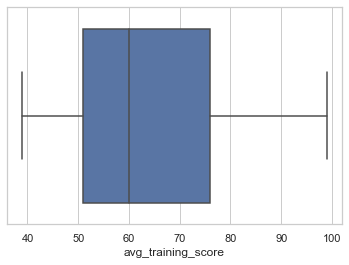

In [504]:
# Показателем с наибольшим числом вариантов ответа является средняя оценка за тренинги, крайне интересный показатель, нарисуем для него боксплот
sns.boxplot(x=df_hr["avg_training_score"])

In [505]:
# Интересно, сущетвенных разбросов не наблюдается, жаль, что основной массив вариантов не доходит до 80, максимумом мы видим число, приближенное к 100. Ну зато значений, существенно меньших 40 не имеется, 
# может тут все не так уж и плохо. Существенных выбросов в данном случае не наблюдаем, распределение смахивает на нормальное 

Text(0, 0.5, 'Amount of employees')

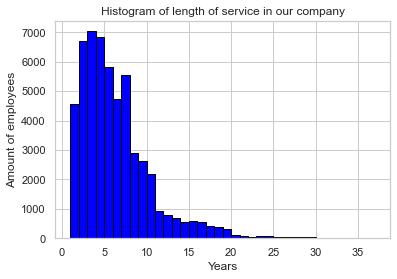

In [506]:
# Отойдем от боксплотов и перейдем к любимейшим гистограммам. Хочется посмотреть, как долго сотрудники работают в нашей компании

plt.hist(df_hr['length_of_service'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of length of service in our company')
plt.xlabel('Years')
plt.ylabel('Amount of employees')

In [507]:
# Хрочется получить больше информации, посмотрим среднее значение времени работы в компании наших сотрудников
np.mean(df_hr.length_of_service)

5.865512333965844

In [508]:
# Почти 6 лет, неплохо. Как мы видим по гистаграмме, в нашей компании наблюдается приятный баланс ньюфагов и олдов! 

In [509]:
# Так, наш информатор сообщал о повышении 5% сотрудников за год, давайте посомтрим на эти данные в конкретных цифрах, выясним, сколько у нас счастличвчиков в этом году:
df_hr['is_promoted'].sum()

4668

In [510]:
# Теперь хитрым способом посмотрим, сколько у нас сотрудников в целом, можно конечно посмотреть количество строк, но лучше вспомним разницу между сам и каунт, не зря же я данные приведены в значениях 0 и 1
df_hr['is_promoted'].count()

54808

In [511]:
# Почти 5 тысяч повышений, очень неплохо, хотя сотрудников у нас тоже туча. Процент ближе к 8, но да ладно, идем дальше.

# Выделим в отдельные массивы сотрудников в зависимости от их повышения в этом году
df_hr_g1 = df_hr[df_hr['is_promoted'] == 1]
df_hr_g0 = df_hr[df_hr['is_promoted'] == 0]

# И сразу проверим что сработало корректно
df_hr_g1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,49017,1,7,1,0,1,1,35,5,3,1,0,50,1
39,58304,1,28,1,1,1,1,33,5,6,1,0,51,1
60,17673,1,4,2,1,0,1,50,4,17,1,0,47,1
66,77981,6,22,1,1,0,1,27,0,1,1,1,58,1
67,16502,1,22,1,1,1,1,27,0,1,0,0,61,1


Text(0, 0.5, 'Amount of employees')

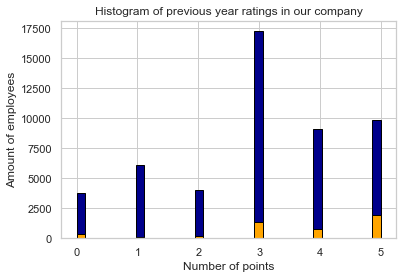

In [512]:
# А теперь посмотрим визуально, как на повышения влияет рейтинг сотрудника за прошлый год 
plt.hist(df_hr_g0['previous_year_rating'], color = 'darkblue', edgecolor = 'black',
         bins = int(180/5))

plt.hist(df_hr_g1['previous_year_rating'], color = 'orange', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of previous year ratings in our company')
plt.xlabel('Number of points')
plt.ylabel('Amount of employees')

Text(0, 0.5, 'Amount of employees')

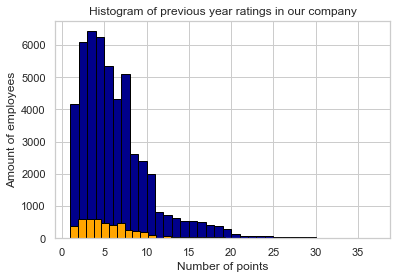

In [513]:
# Хм, очень странная тенденция. Прям совсем плохих перформеров почти не повышают, но почему так много ребят с тройками? Сравним с тем же опытом работы в компании 

plt.hist(df_hr_g0['length_of_service'], color = 'darkblue', edgecolor = 'black',
         bins = int(180/5))

plt.hist(df_hr_g1['length_of_service'], color = 'orange', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of previous year ratings in our company')
plt.xlabel('Number of points')
plt.ylabel('Amount of employees')

In [514]:
# Хмммм, после 10 лет работы в компании мы сотрудников почти не повышаем. Очень странный претендент, по-моему мы напрашиваемся на их уход в другие компании, где они могут продложать разваиваться.

# Ладно, наверное смотреть графы по всем столбцам с данными смысла особо нет, но подобные графики с разделениями по группам крайне эффективны и наглядны при решении нашей проблемы. 
# На последок для этой главы сделаем самое интересное - посмотрим корреляции

# Pandas имеет волшебный метод, который сразу считает матрицу корреляций по всему фрейму
df_hr.corr()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000,0.002,0.004,0.002,-0.002,0.006,-0.005,0.000,0.002,0.001,-0.003,0.008,-0.001,0.001
department,0.002,1.000,-0.005,0.021,0.008,-0.002,-0.004,-0.096,0.033,-0.087,0.058,0.004,0.518,0.002
region,0.004,-0.005,1.000,-0.055,0.106,-0.024,-0.004,-0.251,-0.042,-0.170,-0.009,0.006,0.029,-0.011
education,0.002,0.021,-0.055,1.000,-0.046,-0.010,-0.020,0.383,0.132,0.263,0.024,0.000,0.055,0.035
gender,-0.002,0.008,0.106,-0.046,1.000,0.009,0.085,-0.016,-0.025,-0.020,-0.037,0.002,-0.024,-0.011
recruitment_channel,0.006,-0.002,-0.024,-0.010,0.009,1.000,-0.015,-0.027,0.021,-0.015,0.019,-0.004,0.010,0.009
no_of_trainings,-0.005,-0.004,-0.004,-0.020,0.085,-0.015,1.000,-0.081,-0.064,-0.057,-0.046,-0.008,0.043,-0.025
age,0.000,-0.096,-0.251,0.383,-0.016,-0.027,-0.081,1.000,0.178,0.657,-0.026,-0.008,-0.048,-0.017
previous_year_rating,0.002,0.033,-0.042,0.132,-0.025,0.021,-0.064,0.178,1.000,0.191,0.275,0.021,0.059,0.126
length_of_service,0.001,-0.087,-0.170,0.263,-0.020,-0.015,-0.057,0.657,0.191,1.000,-0.078,-0.040,-0.038,-0.011


In [515]:
# Полный облом, существенная корреляция наблюдается только между возрастом и опытом работы, ну ладно, это нас не остановит в формировании прогностической модели, передем же к ней

# 3. Предварительная оценка возможных фич

Главной фичей будет модель, которая предсказывает вероятность повышения сотрудника на основе его данных (которые по крайне мере имеются в нашей базе). Обучать нашу модель будем линейной регрессии, все рассматриваемые признаки находятся в формате int64, так что проблем возникнуть не должно. Для улучшения модели можем сделать скалирование, отрезать признаки с низким импортансем. 

# 4. Подготовка пайплайна данных, инжиниринг фич

Мы уже поработали над устранением пустых значанеий в датасете и перевели все нечисловые значения к числовому формате в самом файле через эксель (вся информация об этом представлена в предыдущей главе). Так что теперь нам остается только разделить выборку на тренинговый и тестовый сет.

In [516]:
# Разобьем нашу выборку на пространство признаков (X) и ответов (y)

X = df_hr[['department', 'region', 'education', 'gender', 
           'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']]

y = df_hr[['is_promoted']]

In [517]:
# В объекте X у нас оказываются признаки

X

,department,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1,7,2,0,1,35,5,8,1,0,49
1,2,22,1,1,1,30,5,4,0,0,60
2,1,19,1,1,1,34,3,7,0,0,50
3,1,23,1,1,2,39,1,10,0,0,50
4,4,26,1,1,1,45,3,2,0,0,73
...,...,...,...,...,...,...,...,...,...,...,...
54803,4,14,1,1,1,48,3,17,0,0,78
54804,2,27,2,0,1,37,2,6,0,0,56
54805,5,1,1,1,1,27,5,3,1,0,79
54806,1,9,0,1,1,29,1,2,0,0,45


In [518]:
# в объекте 'y' у нас оказываются ответы для этих признаков

y

,is_promoted
0,0
1,0
2,0
3,0
4,0
...,...
54803,0
54804,0
54805,0
54806,0


In [519]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Посмотрим каков у нас оказался размер объектов в трейне и тесте
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(43846, 11)
(10962, 11)
(43846, 1)
(10962, 1)


In [520]:
Y_test

,is_promoted
40907,0
51939,0
6978,0
12814,0
22921,0
...,...
3458,0
26056,0
29981,0
44352,0


# 5. Подготовка и обучение модели, сравнение разных реализаций



In [521]:
lin_model = LinearRegression()

lin_model.fit(X_train, Y_train)

#В этот момент за кадром обучилась небольшая модель линейной регрессии.
#Эта модель использовала зарплаты группы train (Y_train) как ответы и решила внутри себя систему линейных уравнений, назначив нашим признакам (X_train) некоторые веса.

LinearRegression()

In [522]:
# посмотрим, какие из наших признаков оказались наиболее значимыми для определения зарплаты на объектах
importance = lin_model.coef_

print(importance)

[[-0.01772773 -0.00060846  0.01478535  0.00594685 -0.01217703 -0.00189684
   0.01260393  0.00105957  0.10105689  0.29974574  0.00460806]]


In [523]:
# Мде, импортанц конечно крайне невнушительный, спасибо составителю дата сета. Ну ладно, не сворачивать же всю проедланную работу, давайте работать хотя бы с этим

In [524]:
# Определим функцию оценки ошибки получившейся модели:

def model_access(lin_model, X_train, X_test, Y_train, Y_test):

    # model evaluation for training set
    y_train_predict = lin_model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)

    
    print("\n")
    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("--------------------------------------")
    print("\n")

    
    # model evaluation for testing set
    y_test_predict = lin_model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

In [525]:
lin_model = LinearRegression()

lin_model.fit(X_train, Y_train)



LinearRegression()

In [526]:
#Попробуем оценить, насколько наша модель хороша.
#По канону оценку следует на двух выборках: на той, на которой модель тренировалась (X_train, Y_train) и на той, которую модель не видела совсем (X_test, Y_test)

model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 0.2626371529220496
R2 score is 0.12018428353685107
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 0.25825794434497235
R2 score is 0.12206523714930806


In [527]:
#.. RMSE  крайне далек от единицы, это - минус .. но RMSE тоже не велик, это - плю-ууууус !!.. 

# Ну что, модель готова. Правда импортанц у всех показателей вышел ужасно низкий, хотя подобный исход должен был быть очевидным еще на этапе рассмотрения корреляций, они были крайне низкими,
# особенно с параметром получения повышения сотрудником. Ну да ладно, время уже 2 ночи и терять нам нечего, попробуем сделать эти цифры чуть чуть менее ужасными.

# ОК, что мы можем теперь сделать? Модель учитывает все потенциально полезные признаки, но может заблуждаться относительно масштаба фичей, потому что использует числа из них "как есть" в уравнениях
# регрессии. Чтобы получать адекватные значения коэффициентов весов модели надо их уравнять на некой общей шкале. Ну так объяснял процесс мой любимый преподаватель)))) 



In [528]:
def scaling(df):
    scaler = MinMaxScaler() 
    data_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(data_scaled)
    return df_scaled

In [529]:
X_scaled = scaling(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

importance = lin_model.coef_
print(importance)

[[-0.14182183 -0.02007914  0.02957071  0.00594685 -0.10959325 -0.07587379
   0.06301964  0.03814468  0.10105689  0.29974574  0.27648345]]


In [530]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 0.2626371529220496
R2 score is 0.12018428353685107
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 0.25825794434497235
R2 score is 0.12206523714930817


In [531]:
# Да вроде ничего не поменялось, перейдем к нашему последнему оружию - урежем количество признаков, зачем нам этим низкоимпортные (да, я использую такое понятие) признаки

X = df_hr[['department', 'education', 
           'no_of_trainings', 'previous_year_rating', 'KPIs_met >80%', 'awards_won?']]

X_scaled = scaling(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

importance = lin_model.coef_
print(importance)

[[-0.01380197  0.02360456 -0.04854041  0.06547733  0.10629412  0.32647184]]


In [532]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 0.26800480633154466
R2 score is 0.08385427956268254
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 0.26284467254073557
R2 score is 0.09060361395959615


In [533]:
# Ура, стало немного лучше! На последок попробуем урезать модель по макимуму до топ трех компонент по импортанс

X = df_hr[[ 'previous_year_rating', 'KPIs_met >80%', 'awards_won?']]

X_scaled = scaling(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

importance = lin_model.coef_
print(importance)

[[0.06871909 0.10597645 0.3264092 ]]


In [534]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 0.2681206918358365
R2 score is 0.08306182390608818
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 0.262882753336771
R2 score is 0.09034008914408909


In [535]:
# Вроде ничего крадинально не изменилось, а считать нам надо будет меньше, так что это вин вин - модель оставляем 

# Под конец опробуем нашу модель с рандомными параметрами потенциального кандидата на повышение и вычислим его шансы на успех 

lin_model.predict([[5,1,1]])

array([[0.77445271]])

In [536]:
# Ну у идеального кандидата по анализированным параметрам наблюдается почти 80% вероятность получить повышение, жаль не 100%, но естественно модель не настолько идеальна, да и в целом r2 не выстрелил

# 5. Выводы

Ну что же, мы выявили ключевые факторы, которые влияют на повышение сотрудников в нашей компании: это рейтинг за предыдущий год, KPI больше 80% и наличие наград. К сожалению, эти параметры оставляют желать лучшего в связи с их слабой корреляцией с показателем наличия повышения, но лучших варинатов на данный момент у нас нет. Возможно эта проблема была существено решена, если бы данные KPI и наград были представлены в более динамичном варинте, например точные проценты закрытия KPI и точное количество наград, а не просто двоичный код, который мы имеем сейчас. От этого пострадала и разработанная модель, которая имеет низкую надежность, но это лучшее, что мы имеем на данный момент. Возможно в следующий раз стоит учеть больше показателей.

Низкая надежность разработанной модели на основе анализа всех имеющихся данных говорит нам об одном: в нашей боливудской фирме действительно повышают кого попало, нам нужны более четкие критерии повышения, которые будут соблюдаться и отражаться в статистике, не зря народ негодовал и не зря мы провели наше исследование. 